In [103]:
import sys
import os

sys.path.insert(0, os.path.abspath('src'))

from src.nn import NN
import matplotlib.pyplot as plt

n = NN([3, 5, 5, 1])

xs =[
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
    [1.0, 1.0, -2.0],
] # Matricea de intrare, 1 vector pentru fiecare neuron din layer

ys = [1.0, -1.0, -1.0, 1.0, -1.0] # Valori de iesire dorite

In [104]:
loss_values = []

for k in range(400):
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    # print('Inainte de retropropagare:')
    # print(n.layers[0].neuroni[0].parametri())
    # print()
    
    for p in n.parametri():
        p.derivata = 0.0
        
    loss.retroprop()
    
    # print('Dupa retropropagare:')
    # print(n.layers[0].neuroni[0].parametri())
    # print()
    
    for p in n.parametri():
        p.valoare += -0.01 * p.derivata
    
    # print('Dupa actualizare:')
    # print(n.layers[0].neuroni[0].parametri())
    # print()
    # 
    loss_values.append(loss.valoare)
    print(f'Iteratia {k}, Loss: {loss.valoare:.4f}')
    # print('**'*20)
    # print()
        
ypred
# n.parametri()

Iteratia 0, Loss: 3.8951
Iteratia 1, Loss: 3.5162
Iteratia 2, Loss: 3.3266
Iteratia 3, Loss: 3.1623
Iteratia 4, Loss: 2.9928
Iteratia 5, Loss: 2.8131
Iteratia 6, Loss: 2.6227
Iteratia 7, Loss: 2.4239
Iteratia 8, Loss: 2.2220
Iteratia 9, Loss: 2.0245
Iteratia 10, Loss: 1.8398
Iteratia 11, Loss: 1.6745
Iteratia 12, Loss: 1.5312
Iteratia 13, Loss: 1.4093
Iteratia 14, Loss: 1.3057
Iteratia 15, Loss: 1.2171
Iteratia 16, Loss: 1.1402
Iteratia 17, Loss: 1.0726
Iteratia 18, Loss: 1.0123
Iteratia 19, Loss: 0.9581
Iteratia 20, Loss: 0.9087
Iteratia 21, Loss: 0.8635
Iteratia 22, Loss: 0.8219
Iteratia 23, Loss: 0.7833
Iteratia 24, Loss: 0.7474
Iteratia 25, Loss: 0.7139
Iteratia 26, Loss: 0.6825
Iteratia 27, Loss: 0.6531
Iteratia 28, Loss: 0.6255
Iteratia 29, Loss: 0.5996
Iteratia 30, Loss: 0.5751
Iteratia 31, Loss: 0.5520
Iteratia 32, Loss: 0.5302
Iteratia 33, Loss: 0.5096
Iteratia 34, Loss: 0.4901
Iteratia 35, Loss: 0.4717
Iteratia 36, Loss: 0.4543
Iteratia 37, Loss: 0.4377
Iteratia 38, Loss: 0.4

[Scalar(valoare=0.9820, deriv=-0.0361),
 Scalar(valoare=-0.9960, deriv=0.0080),
 Scalar(valoare=-0.9497, deriv=0.1007),
 Scalar(valoare=0.9133, deriv=-0.1734),
 Scalar(valoare=-0.9297, deriv=0.1405)]

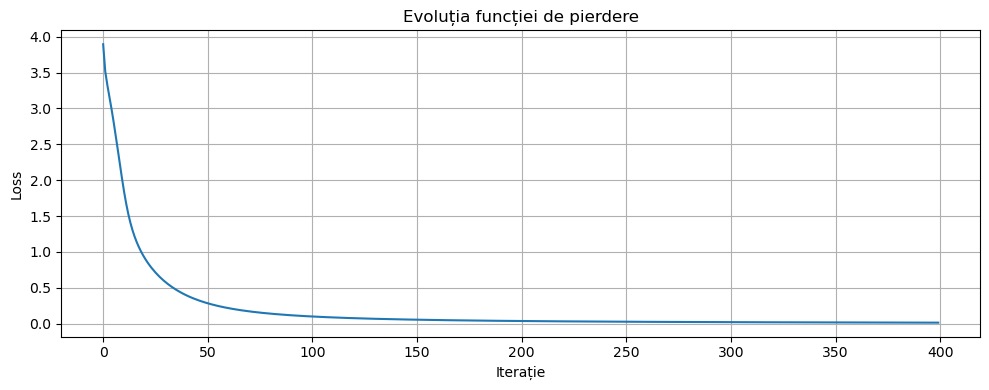

In [105]:
plt.figure(figsize=(10, 4))
plt.plot(loss_values)
plt.title('Evoluția funcției de pierdere')
plt.xlabel('Iterație')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.savefig('./img/loss_curve.png')
plt.show()